In [44]:
#importo e librerie che mi serviranno
import pymongo
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import numpy as np
URI = "mongodb://127.0.0.1:27017/?readPreference=primary&ssl=false"
client = pymongo.MongoClient(URI)
db = client['movie_dataset']

In [45]:
#lista dei film
df_film = pd.DataFrame(db.metadata.find({}, {'_id':1, 'vote_average':1 , 'vote_count':1, 'release_date':1 , 'revenue':1}))


In [46]:
df_film.dtypes

_id               int64
release_date     object
revenue         float64
vote_average    float64
vote_count      float64
dtype: object

In [47]:
df_film.isna().sum()

_id              0
release_date    87
revenue          3
vote_average     3
vote_count       3
dtype: int64

In [48]:
#prendo solo le righe dove non ci sono na
df_film = df_film[df_film['release_date'].notna()]


In [49]:
df_film['release_date'] = pd.to_datetime(df_film['release_date'])

In [50]:
df_film.dtypes

_id                      int64
release_date    datetime64[ns]
revenue                float64
vote_average           float64
vote_count             float64
dtype: object

In [51]:
df_film.isna().sum()

_id             0
release_date    0
revenue         0
vote_average    0
vote_count      0
dtype: int64

In [52]:
df_film

,_id,release_date,revenue,vote_average,vote_count
0,862,1995-10-30,373554033.0,7.7,5415.0
1,8844,1995-12-15,262797249.0,6.9,2413.0
2,15602,1995-12-22,0.0,6.5,92.0
3,31357,1995-12-22,81452156.0,6.1,34.0
4,11862,1995-02-10,76578911.0,5.7,173.0
...,...,...,...,...,...
45427,30840,1991-05-13,0.0,5.7,26.0
45429,111109,2011-11-17,0.0,9.0,3.0
45430,67758,2003-08-01,0.0,3.8,6.0
45431,227506,1917-10-21,0.0,0.0,0.0


In [53]:
df_film['month'] = pd.DatetimeIndex(df_film['release_date']).month

In [54]:
df_film['year'] = pd.DatetimeIndex(df_film['release_date']).year

In [55]:
df_film.sample(10)

,_id,release_date,revenue,vote_average,vote_count,month,year
13925,69342,1991-07-26,0.0,5.1,8.0,7,1991
26181,81649,2010-09-14,0.0,5.0,1.0,9,2010
20126,99223,2012-09-24,0.0,4.9,17.0,9,2012
11477,8618,2006-10-02,13401952.0,6.6,66.0,10,2006
36433,225244,1953-08-31,0.0,7.5,1.0,8,1953
45072,51195,1993-08-31,0.0,5.4,17.0,8,1993
4604,10016,2001-08-24,14010832.0,4.8,299.0,8,2001
37315,254661,2009-01-01,0.0,9.0,1.0,1,2009
38748,279332,2014-05-11,0.0,4.0,2.0,5,2014
25141,121992,1940-12-19,0.0,6.3,4.0,12,1940


In [56]:
df_film = df_film.loc[df_film['year'] >= 2000]    

In [57]:
df_film = df_film.loc[df_film['vote_average'] > 0.0]  

In [58]:
df_revenue = df_film

In [59]:
df_film = df_film.groupby(['month', 'year']).agg({'vote_average':'mean'})

In [60]:
df_film

vote_average
month year              
1     2000      5.688679
      2001      5.867143
      2002      5.915232
      2003      5.927820
      2004      5.996226
...                  ...
12    2012      5.737963
      2013      6.095312
      2014      5.977876
      2015      6.240741
      2016      6.381111

[213 rows x 1 columns]

In [61]:
df_film = df_film.unstack(level=0)
df_film

vote_average                                                    \
month           1         2         3         4         5         6    
year                                                                   
2000      5.688679  5.831915  6.027273  5.980000  6.004762  5.434694   
2001      5.867143  5.900000  6.014063  5.538776  5.962500  5.779167   
2002      5.915232  5.840385  6.160656  5.730435  6.098485  5.714286   
2003      5.927820  5.835294  5.812281  5.828571  6.091892  5.841176   
2004      5.996226  5.694203  6.195238  6.000000  6.157333  5.985714   
2005      5.763793  6.188679  5.692683  5.917808  5.903409  5.759459   
2006      5.732051  5.865152  5.833962  6.010112  6.014667  5.840625   
2007      5.794872  5.856180  5.896629  5.627586  5.927083  5.825806   
2008      5.784956  5.720755  5.704706  5.645349  5.943836  5.823077   
2009      5.753488  5.815000  5.873394  5.653226  6.085263  5.721591   
2010      5.710366  5.662500  6.079348  5.900000  5.898361  6.111712   
2011      5.698611  5.927885  5.971654  6.015152  6.028571  5.763725   
2012      5.966154  5.952632  5.918000  5.895652  5.769167  5.823729   
2013      5.807190  5.776471  5.742384  6.016234  5.895652  5.930400   
2014      6.021854  5.886508  5.966667  6.063731  6.120741  5.882540   
2015      6.143038  6.093077  6.087671  6.118868  5.987023  6.009655   
2016      6.070677  6.335000  6.276296  6.089744  6.250476  6.020354   
2017      6.248193  6.305882  6.503488  6.509459  6.212308  6.359677   

                                                                   
month        7         8         9         10        11        12  
year                                                               
2000   5.980000  6.043103  5.982292  5.801370  5.780000  6.025424  
2001   6.061538  5.943077  6.297030  5.863415  6.156452  5.901515  
2002   5.791304  5.575472  6.221739  6.087500  6.050000  6.210938  
2003   5.519048  5.970130  6.179592  6.161333  5.961111  5.837705  
2004   5.849020  5.770492  6.205085  5.975581  6.080282  6.072727  
2005   5.727692  5.970313  6.123358  5.945652  5.953488  5.924359  
2006   5.877778  6.144706  6.111465  5.996875  5.696703  5.929545  
2007   6.131343  6.069565  6.122930  5.779130  6.080208  6.155000  
2008   5.821348  5.754167  5.931875  6.057862  6.066355  5.970370  
2009   5.849315  6.002830  5.962295  6.072024  5.961654  5.918280  
2010   5.870130  5.966667  6.044118  5.885106  6.022321  6.026923  
2011   5.780808  6.124490  5.937657  5.826404  5.935928  5.784211  
2012   5.860714  5.920833  6.084416  5.902139  6.027848  5.737963  
2013   5.965812  6.036620  5.977533  6.138393  6.291875  6.095312  
2014   6.000962  5.983537  5.982096  6.033772  6.101504  5.977876  
2015   5.939167  5.929677  6.154737  5.999531  6.213816  6.240741  
2016   6.221053  6.008571  6.404878  6.406173  6.454701  6.381111  
2017   6.425806  6.788235  6.300000       NaN       NaN       NaN

In [62]:
df_film = df_film.dropna()

([<matplotlib.axis.XTick at 0x1eb37880508>,
 [Text(0.5, 0, 'Jan'),
  Text(1.5, 0, 'Feb'),
  Text(2.5, 0, 'Mar'),
  Text(3.5, 0, 'Apr'),
  Text(4.5, 0, 'May'),
  Text(5.5, 0, 'Jun'),
  Text(6.5, 0, 'Jul'),
  Text(7.5, 0, 'Aug'),
  Text(8.5, 0, 'Sep'),
  Text(9.5, 0, 'Oct'),
  Text(10.5, 0, 'Nov'),
  Text(11.5, 0, 'Dec')])

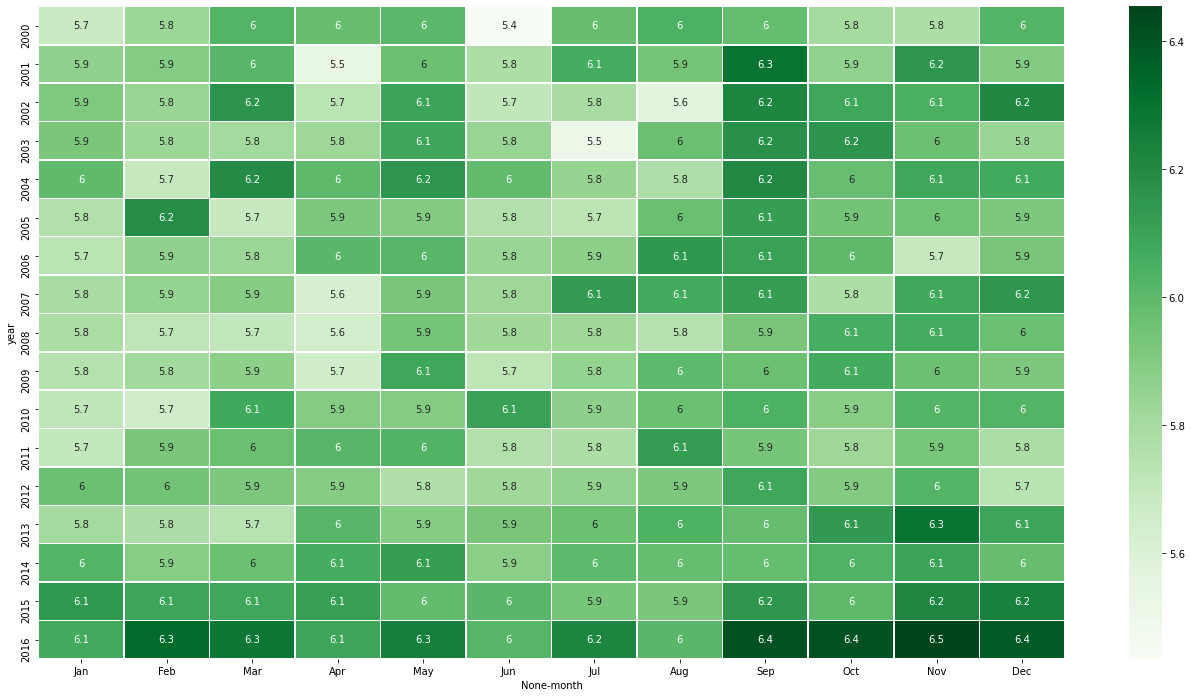

In [63]:

fig, ax = plt.subplots(figsize=(23,12))
sns.heatmap(df_film, annot=True, linewidths=.5, cmap="Greens")

xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, labels=xticks_labels)


In [65]:
df_revenue = df_revenue.loc[df_revenue['revenue'] > 0.0]  
df_revenue

,_id,release_date,revenue,vote_average,vote_count,month,year
3059,10471,2000-01-12,59827328.0,6.5,145.0,1,2000
3072,10384,2000-01-14,14828081.0,4.9,109.0,1,2000
3120,75531,2000-01-28,3003296.0,4.6,14.0,1,2000
3154,4234,2000-02-03,161834276.0,5.7,749.0,2,2000
3157,29076,2000-02-04,1631839.0,5.4,24.0,2,2000
...,...,...,...,...,...,...,...
45366,280422,2014-06-05,3.0,6.0,4.0,6,2014
45368,240789,2009-10-09,50656.0,6.3,3.0,10,2009
45376,62757,2006-11-23,1328612.0,5.8,6.0,11,2006
45379,63281,2010-09-30,1268793.0,4.0,3.0,9,2010


In [76]:
df_revenue = df_revenue.groupby("month").agg({'revenue':'mean'})
df_revenue.reset_index(inplace=True)
df_revenue['month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

Text(0.5, 1.0, 'Guadagno dei film per mesi dal 2000 al 2016')

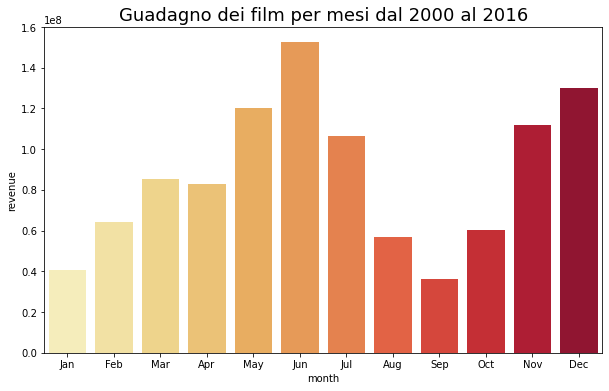

In [80]:
fig = plt.figure(figsize=(10,6))  
splot = sns.barplot(y="revenue", x="month",data = df_revenue, palette="YlOrRd")
plt.title('Guadagno dei film per mesi dal 2000 al 2016', fontsize=18)